# House Market

Let's go a little further into python.

1. Download the four files <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+visualisation+et+collaboration/house_price/square_feet.csv" target="_blank">```square_feet.csv```</a> / <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+visualisation+et+collaboration/house_price/number_of_bathrooms.csv" target="_blank">```number_of_bathrooms.csv```</a> / <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+visualisation+et+collaboration/house_price/number_of_rooms.csv" target="_blank">```number_of_rooms.csv```</a> / <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+visualisation+et+collaboration/house_price/house_price.csv" target="_blank">```house_price.csv```</a>

2. Read the files and create the 4 corresponding DataFrames


In [3]:
import pandas as pd

square_feet_df = pd.read_csv('superficie.csv')
number_of_bathrooms_df = pd.read_csv('nombre_de_sdb.csv')
number_of_rooms_df = pd.read_csv('nombre_de_chambres.csv')
house_price_df = pd.read_csv('house_price.csv')

3. Give a column name to the three datasets that don't have a header in the source file

In [12]:
square_feet_df = pd.read_csv('superficie.csv', names=['Square Feet'])
number_of_bathrooms_df = pd.read_csv('nombre_de_sdb.csv', names=['Number of Bathrooms'])
number_of_rooms_df = pd.read_csv('nombre_de_chambres.csv', names=['Number of Rooms'])
house_price_df = pd.read_csv('house_price.csv', names=['House Price'])
square_feet_df.head()

,Square Feet
0,28844
1,27667
2,14742
3,28089
4,11713


In [13]:
number_of_bathrooms_df.head()

,Number of Bathrooms
0,2
1,1
2,1
3,3
4,1


In [11]:
number_of_rooms_df.head()

,Number of Rooms
0,1
1,4
2,1
3,4
4,2


In [32]:
house_price_df.head()

,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0


,id,rooms
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2


,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0


4. Make an inner join of these four datasets into a single dataframe. ²

In [16]:
df = pd.concat([square_feet_df, number_of_bathrooms_df, number_of_rooms_df, house_price_df], axis=1)
df.head()


,Square Feet,Number of Bathrooms,Number of Rooms,Unnamed: 0,id,house_price
0,28844,2,1,0,14,1918154.0
1,27667,1,4,1,30,739142.0
2,14742,1,1,2,70,1621938.0
3,28089,3,4,3,77,1319862.0
4,11713,1,2,4,50,146250.0


5. What is the average surface area of the houses in our dataset?

In [17]:
df['Square Feet'].mean()

20439.77

6. What is the median and average number of rooms?

In [21]:
df['Number of Rooms'].median()
print(df['Number of Rooms'].median())
df['Number of Rooms'].mean()
print(df['Number of Rooms'].mean())

2.0
2.42


7. What is the average cost of a house?

In [38]:
df['house_price'].mean()

767747.87

8. What is the average cost of a house, depending on the number of rooms it has?

In [37]:
df.groupby('Number of Rooms')['house_price'].mean()

Number of Rooms
1    783460.260870
2    606449.903226
3    819982.777778
4    937669.421053
Name: house_price, dtype: float64

10. The average cost per room doesn't tell us much. Let's try to categorize by size.

  - Create a new column in your dataset that we'll call home_size
Create three categories that respectively correspond to :

      - "very large" == "a house larger than 25,000 sqrt_feet"
      
      - "large" == "a house between 20,000 and 25,000 sqrt_feet"
      
      - "medium" == "a house between 15,000 and 20,000 sqrt_feet"
    
      - "small" == "a house between 10,000 and 15,000 sqrt_feet" 
    
      - "very small" == a house less than 10,000 sqrt_feet"
      
Fill in the corresponding rows in the house_size column.

**Tip:**

You can use the <a href ="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html" target="_blank">```apply(lambda)```</a> function

In [39]:
def home_size(size):
    if size > 25000:
        return 'very large'
    elif size > 20000:
        return 'large'
    elif size > 15000:
        return 'medium'
    elif size > 10000:
        return 'small'
    else:
        return 'very small'
    
df['home_size'] = df['Square Feet'].apply(lambda x: home_size(x))
df.head()

,Square Feet,Number of Bathrooms,Number of Rooms,Unnamed: 0,id,house_price,home_size
0,28844,2,1,0,14,1918154.0,very large
1,27667,1,4,1,30,739142.0,very large
2,14742,1,1,2,70,1621938.0,small
3,28089,3,4,3,77,1319862.0,very large
4,11713,1,2,4,50,146250.0,small


11. What is the average cost of a house depending on its size category?


In [41]:
df.groupby('home_size')['house_price'].mean()
print(df.groupby('home_size')['house_price'].mean())

home_size
large         725983.956522
medium        672382.368421
small         857188.346154
very large    781718.562500
Name: house_price, dtype: float64


 12. Apply the code below to view your result. What can you conclude?

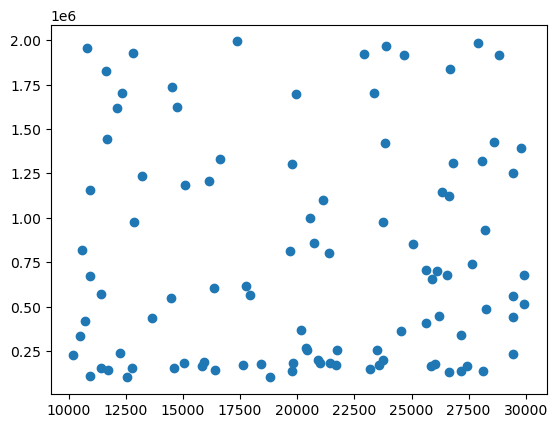

In [48]:
import matplotlib.pyplot as plt
plt.scatter(df['Square Feet'], df['house_price'])

plt.show()